### Import Libraries

In [1]:
#### basic RL algorithm known as Epsilon-Greedy for solving the Multi-Armed Bandit problem.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


### Define the Environment (Bandit Arms)

In [3]:
# Let's define a class Bandit that represents our environment with multiple bandit arms, each having a different reward distribution.

class Bandit:
    def __init__(self, num_bandits):
        self.num_bandits = num_bandits
        self.bandit_probs = np.random.rand(num_bandits)  # True probability of each bandit
        self.optimal_bandit = np.argmax(self.bandit_probs)  # Index of the bandit with the highest probability
    
    def pull(self, bandit_index):
        # Return a reward based on the probability of the bandit
        if np.random.rand() < self.bandit_probs[bandit_index]:
            return 1.0  # Success
        else:
            return 0.0  # Failure


### Implement Epsilon-Greedy Agent

In [4]:
#  implement an Epsilon-Greedy agent that selects bandits based on the epsilon-greedy policy.
class EpsilonGreedyAgent:
    def __init__(self, num_bandits, epsilon):
        self.num_bandits = num_bandits
        self.epsilon = epsilon
        self.q_values = np.zeros(num_bandits)  # Estimated values of each bandit
        self.action_counts = np.zeros(num_bandits)  # Number of times each action (bandit pull) has been selected
    
    def select_action(self):
        if np.random.rand() < self.epsilon:
            # Explore: Choose a random bandit
            action = np.random.randint(self.num_bandits)
        else:
            # Exploit: Choose the bandit with the highest estimated value (Q-value)
            action = np.argmax(self.q_values)
        
        return action
    
    def update(self, action, reward):
        # Update Q-value estimates and action counts based on the observed reward
        self.action_counts[action] += 1
        self.q_values[action] += (reward - self.q_values[action]) / self.action_counts[action]

### Run the Simulation

Optimal Bandit: 3
Total reward: 792.0
Optimal bandit chosen ratio: 0.7740


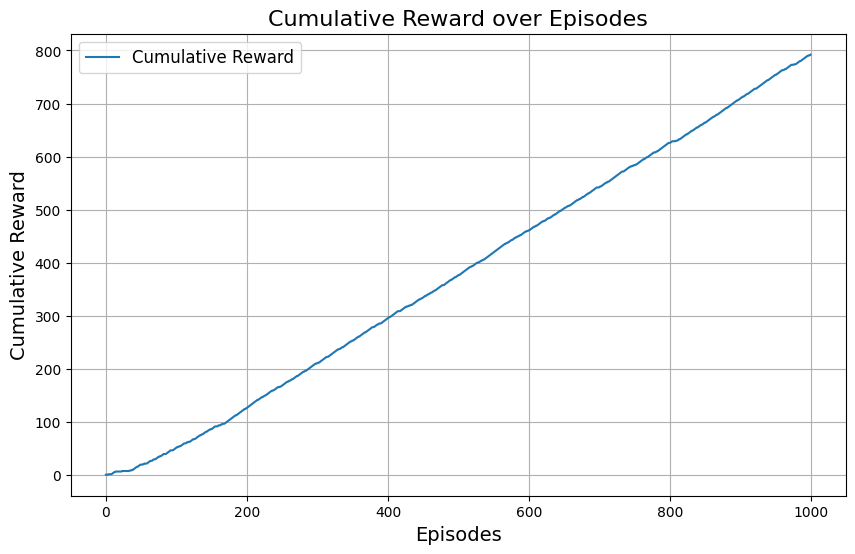

In [5]:
def run_bandit_simulation(agent, bandit_env, num_episodes):
    rewards = []
    optimal_bandit_chosen = []
    
    for episode in range(num_episodes):
        # Select action using the agent's policy
        action = agent.select_action()
        
        # Get reward from the environment (bandit)
        reward = bandit_env.pull(action)
        
        # Update agent's Q-value estimates
        agent.update(action, reward)
        
        # Track cumulative rewards and optimal bandit selections
        rewards.append(reward)
        optimal_bandit_chosen.append(1 if action == bandit_env.optimal_bandit else 0)
    
    return rewards, optimal_bandit_chosen

# Parameters
num_bandits = 5
epsilon = 0.1
num_episodes = 1000

# Initialize Bandit environment and Agent
bandit_env = Bandit(num_bandits)
agent = EpsilonGreedyAgent(num_bandits, epsilon)

# Run simulation
rewards, optimal_bandit_chosen = run_bandit_simulation(agent, bandit_env, num_episodes)

# Print results
print(f"Optimal Bandit: {bandit_env.optimal_bandit}")
print(f"Total reward: {sum(rewards)}")
print(f"Optimal bandit chosen ratio: {sum(optimal_bandit_chosen) / num_episodes:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(rewards), label='Cumulative Reward')
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Reward', fontsize=14)
plt.title('Cumulative Reward over Episodes', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()


In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the model coefficients
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Mean Squared Error: 95764655.81320488
Model Coefficients: [ 299.85194854 8961.66920624]
Model Intercept: 38898.68310389749


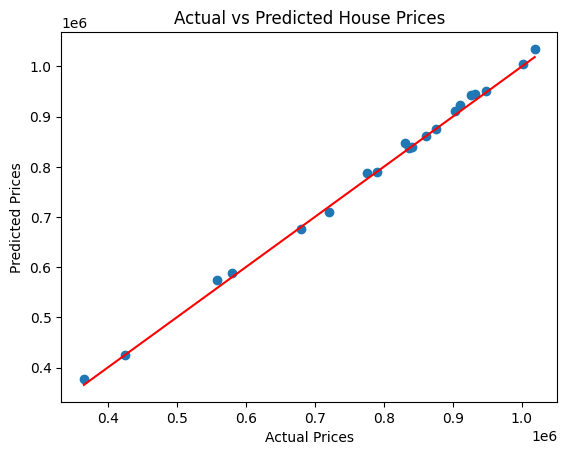

In [9]:
# Plot actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x
plt.show()


In [10]:
# New data for prediction: [size, bedrooms]
new_data = np.array([[2000, 3], [1500, 2], [2500, 4], [1200, 2]])

# Make predictions
new_predictions = model.predict(new_data)

# Output the new data and their corresponding predictions
for i, (size, bedrooms) in enumerate(new_data):
    print(f"Predicted price for house with size {size} sq ft and {bedrooms} bedrooms: ${new_predictions[i]:,.2f}")

Predicted price for house with size 2000 sq ft and 3 bedrooms: $665,487.59
Predicted price for house with size 1500 sq ft and 2 bedrooms: $506,599.94
Predicted price for house with size 2500 sq ft and 4 bedrooms: $824,375.23
Predicted price for house with size 1200 sq ft and 2 bedrooms: $416,644.36


### End of Notebook